In [45]:
import qiskit
from qiskit import QuantumCircuit,  QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_histogram

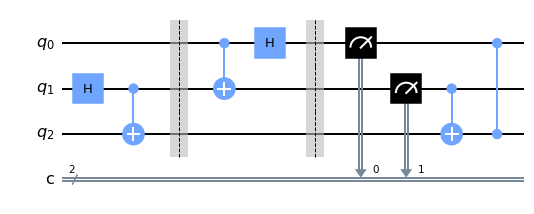

In [46]:
qc = QuantumCircuit(3,2)
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([0,1],[0,1])
qc.cx(1,2)
qc.cz(0,2)
qc.draw('mpl')

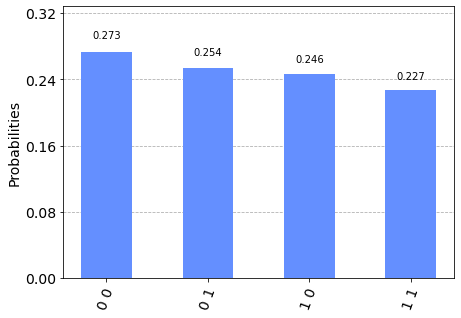

In [49]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc,backend=backend,shots=1024).result()
counts = job.get_counts()
plot_histogram(counts)

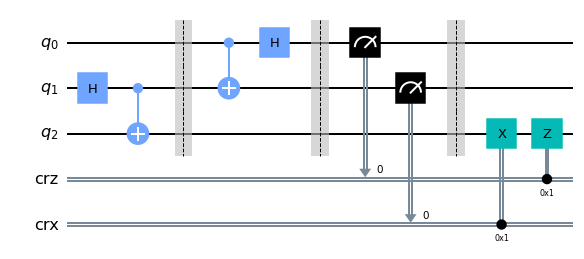

In [48]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([qr[0],qr[1]],[crz[0],crx[0]])

qc.barrier()
qc.x(2).c_if(crx, 1) # Apply gates if the registers 
qc.z(2).c_if(crz, 1) # are in the state '1'

qc.draw('mpl')